In [18]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf

In [19]:
ticker = "MSFT"


data = yf.download(ticker, start="2020-01-01", end="2024-12-17")
data = data[['Close']]
data

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,MSFT
Date,
2020-01-02,153.323288
2020-01-03,151.414154
2020-01-06,151.805496
2020-01-07,150.421356
2020-01-08,152.817337
...,...
2024-12-10,442.442841
2024-12-11,448.091522


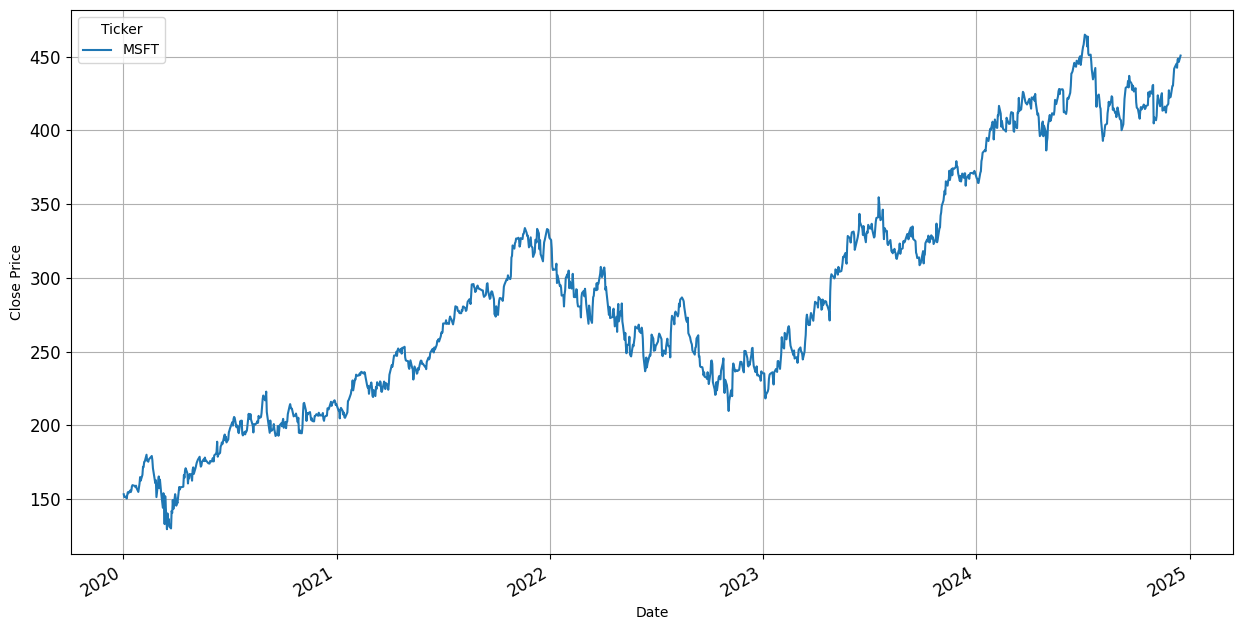

In [20]:
data['Close'].plot(figsize=(15,8), fontsize=12)
plt.grid()
plt.ylabel('Close Price')
plt.show()

Simple Moving Averages

In [21]:
short_window = 50
long_window = 200
data['SMA50'] = data['Close'].rolling(window=short_window).mean()
data['SMA200'] = data['Close'].rolling(window=long_window).mean()

data

Price,Close,SMA50,SMA200
Ticker,MSFT,,
Date,,,
2020-01-02,153.323288,NaN,NaN
2020-01-03,151.414154,NaN,NaN
2020-01-06,151.805496,NaN,NaN
2020-01-07,150.421356,NaN,NaN
2020-01-08,152.817337,NaN,NaN
...,...,...,...
2024-12-10,442.442841,420.700977,420.897255
2024-12-11,448.091522,421.282618,421.115750


In [22]:
data['Signal_SMA'] = 0  
data['Signal_SMA'] = np.where(data['SMA50'] > data['SMA200'], 1, 0) 

data['Position_SMA'] = data['Signal_SMA'].diff()

data['Position_SMA'].dropna()
data

Price,Close,SMA50,SMA200,Signal_SMA,Position_SMA
Ticker,MSFT,,,,
Date,,,,,
2020-01-02,153.323288,NaN,NaN,0,NaN
2020-01-03,151.414154,NaN,NaN,0,0.0
2020-01-06,151.805496,NaN,NaN,0,0.0
2020-01-07,150.421356,NaN,NaN,0,0.0
2020-01-08,152.817337,NaN,NaN,0,0.0
...,...,...,...,...,...
2024-12-10,442.442841,420.700977,420.897255,0,0.0
2024-12-11,448.091522,421.282618,421.115750,1,1.0


In [23]:
data['Position_SMA'].unique()

array([nan,  0.,  1., -1.])

<function matplotlib.pyplot.show(close=None, block=None)>

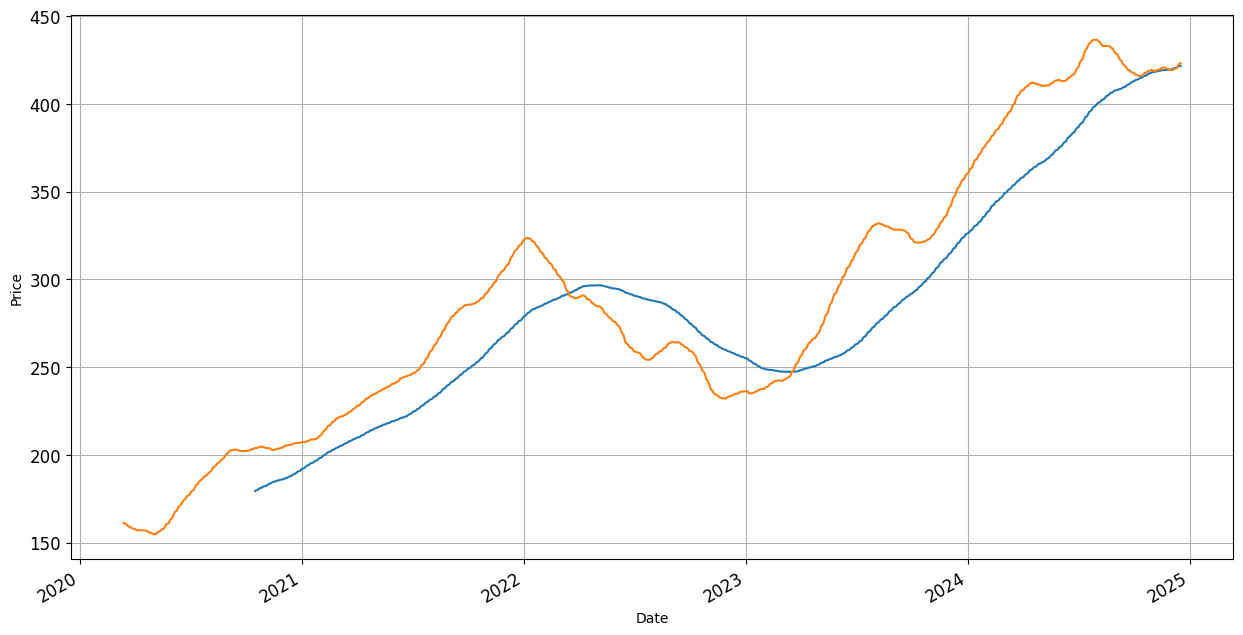

In [24]:
data['SMA200'].plot(figsize=(15,8), fontsize=12)
data['SMA50'].plot(figsize=(15,8), fontsize=12)
plt.grid()
plt.ylabel('Price')
plt.show

In [25]:
data['Signal_SMA'] = 0  
data['Signal_SMA'] = np.where(data['SMA50'] > data['SMA200'], 1, 0) 

data['Position_SMA'] = data['Signal_SMA'].diff()

data

Price,Close,SMA50,SMA200,Signal_SMA,Position_SMA
Ticker,MSFT,,,,
Date,,,,,
2020-01-02,153.323288,NaN,NaN,0,NaN
2020-01-03,151.414154,NaN,NaN,0,0.0
2020-01-06,151.805496,NaN,NaN,0,0.0
2020-01-07,150.421356,NaN,NaN,0,0.0
2020-01-08,152.817337,NaN,NaN,0,0.0
...,...,...,...,...,...
2024-12-10,442.442841,420.700977,420.897255,0,0.0
2024-12-11,448.091522,421.282618,421.115750,1,1.0


In [26]:
data.to_csv('Data.csv')

In [27]:
data.index = pd.to_datetime(data.index)
data_sma = data[data.index > '2020-03-20']
data_sma

Price,Close,SMA50,SMA200,Signal_SMA,Position_SMA
Ticker,MSFT,,,,
Date,,,,,
2020-03-23,130.157150,159.016805,NaN,0,0.0
2020-03-24,141.987869,158.776351,NaN,0,0.0
2020-03-25,140.628677,158.471676,NaN,0,0.0
2020-03-26,149.425186,158.364886,NaN,0,0.0
2020-03-27,143.289673,158.115341,NaN,0,0.0
...,...,...,...,...,...
2024-12-10,442.442841,420.700977,420.897255,0,0.0
2024-12-11,448.091522,421.282618,421.115750,1,1.0


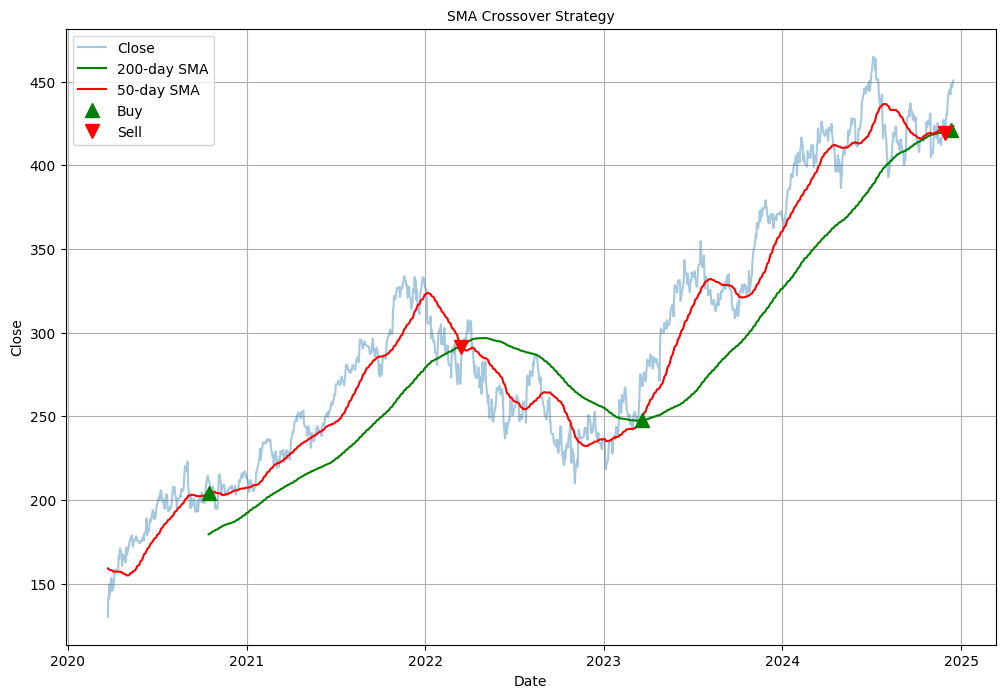

In [28]:
import matplotlib.pyplot as plt
import mplcursors

plt.figure(figsize=(12, 8))

# Plot the closing prices
plt.plot(data_sma['Close'], alpha=0.4, label='Close')

# Plot the 200-day SMA
plt.plot(data_sma['SMA200'], color='g', label='200-day SMA')

# Plot the 50-day SMA
plt.plot(data_sma['SMA50'], color='r', label='50-day SMA')

# Plot 'buy' signals
plt.plot(data_sma[data_sma['Position_SMA'] == 1].index, 
         data_sma['SMA50'][data_sma['Position_SMA'] == 1], 
         '^', markersize=10, color='g', alpha=1, label='Buy')

plt.plot(data_sma[data_sma['Position_SMA'] == -1].index, 
         data_sma['SMA50'][data_sma['Position_SMA'] == -1], 
         'v', markersize=10, color='r', alpha=1, label='Sell')

# Set labels and title
plt.ylabel('Close', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.title('SMA Crossover Strategy', fontsize=10)
plt.legend()
plt.grid()

# Show the figure
plt.show()

In [29]:
short_window = 50
long_window = 200

data['EMA50'] = data['Close'].ewm(span=short_window).mean()

data['EMA200'] = data['Close'].ewm(span=long_window).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

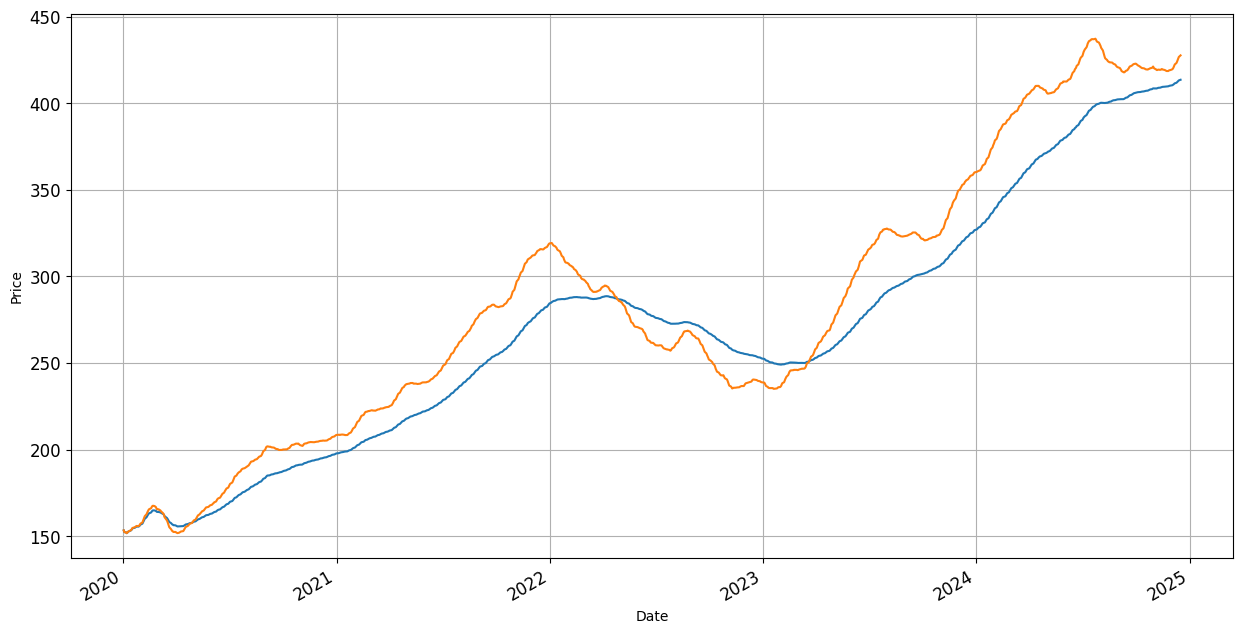

In [30]:
data['EMA200'].plot(figsize=(15,8), fontsize=12)
data['EMA50'].plot(figsize=(15,8), fontsize=12)
plt.grid()
plt.ylabel('Price')
plt.show

Buy and Sell Signals

In [31]:
data['Signal_EMA'] = 0  
data['Signal_EMA'] = np.where(data['EMA50'] > data['EMA200'], 1, 0) 

data['Position_EMA'] = data['Signal_EMA'].diff()

data

Price,Close,SMA50,SMA200,Signal_SMA,Position_SMA,EMA50,EMA200,Signal_EMA,Position_EMA
Ticker,MSFT,,,,,,,,
Date,,,,,,,,,
2020-01-02,153.323288,NaN,NaN,0,NaN,153.323288,153.323288,0,NaN
2020-01-03,151.414154,NaN,NaN,0,0.0,152.349630,152.363948,0,0.0
2020-01-06,151.805496,NaN,NaN,0,0.0,152.160949,152.175933,0,0.0
2020-01-07,150.421356,NaN,NaN,0,0.0,151.699616,151.730687,0,0.0
2020-01-08,152.817337,NaN,NaN,0,0.0,151.941394,151.952385,0,0.0
...,...,...,...,...,...,...,...,...,...
2024-12-10,442.442841,420.700977,420.897255,0,0.0,423.937206,412.052285,1,0.0
2024-12-11,448.091522,421.282618,421.115750,1,1.0,424.884434,412.410886,1,0.0


Plotting the graph

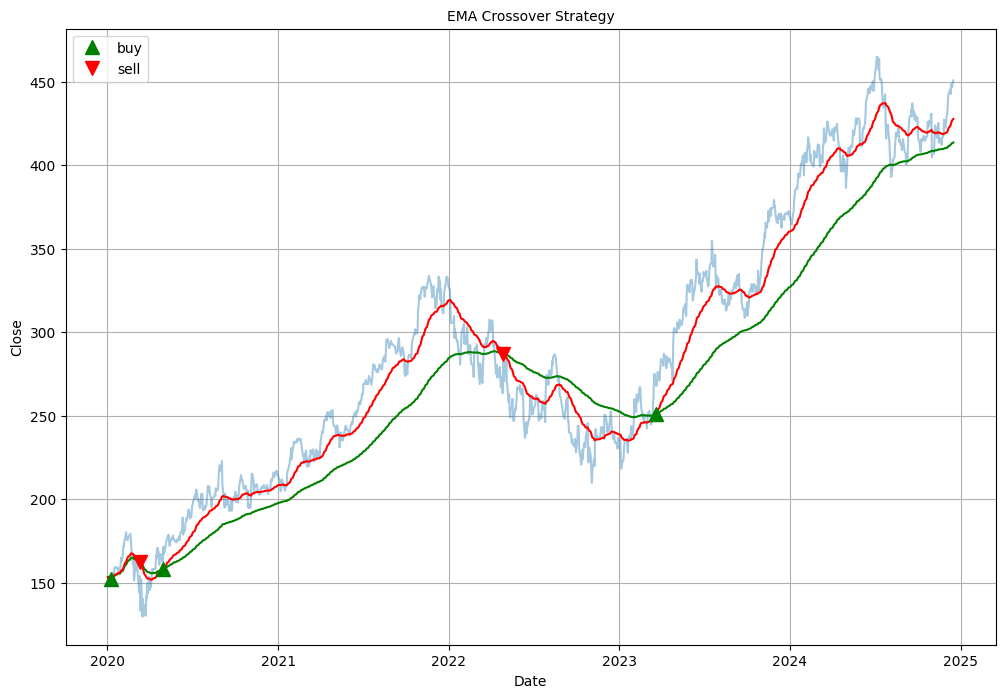

In [32]:
plt.figure(figsize=(12,8))

plt.plot(data['Close'], alpha=0.4)
plt.plot(data['EMA200'],color='g')
plt.plot(data['EMA50'], color='r')



plt.plot(data[data['Position_EMA'] == 1].index, 
         data['EMA50'][data['Position_EMA'] == 1], 
         '^', markersize = 10, color = 'g', alpha = 1, label = 'buy')


plt.plot(data[data['Position_EMA'] == -1].index, 
         data['EMA50'][data['Position_EMA'] == -1], 
         'v', markersize = 10, color = 'r', alpha = 1, label = 'sell')
plt.ylabel('Close', fontsize = 10 )
plt.xlabel('Date', fontsize = 10 )
plt.title('EMA Crossover Strategy', fontsize = 10)
plt.legend()
plt.grid()
plt.show()

Total Return SMA: 115.38%
Total Return EMA: 146.51%


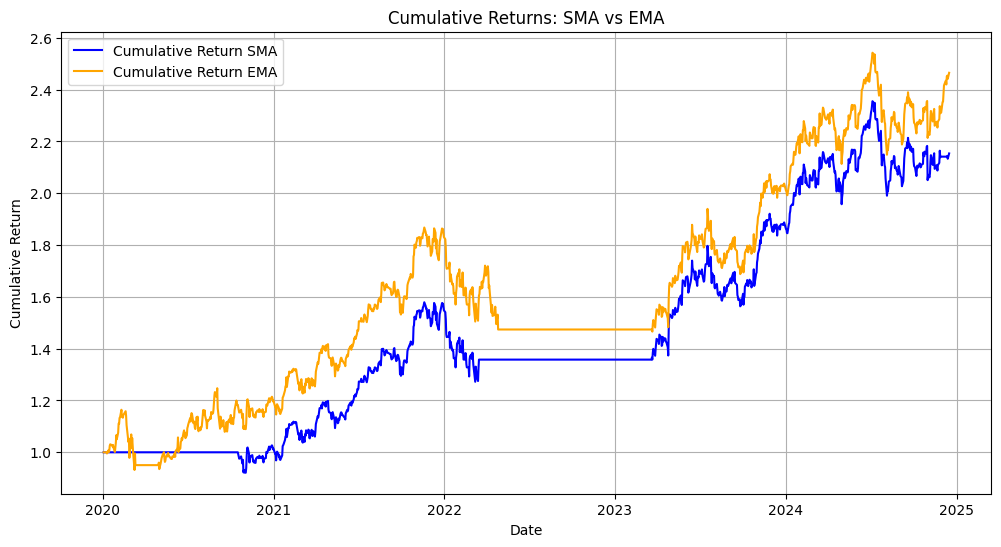

In [33]:
data['Daily_Return'] = data['Close'].pct_change()

data['Strategy_Return_SMA'] = data['Daily_Return'] * data['Signal_SMA'].shift(1)
data['Strategy_Return_EMA'] = data['Daily_Return'] * data['Signal_EMA'].shift(1)

data['Cumulative_Return_SMA'] = (1 + data['Strategy_Return_SMA']).cumprod()
data['Cumulative_Return_EMA'] = (1 + data['Strategy_Return_EMA']).cumprod()

total_return_sma = data['Cumulative_Return_SMA'].iloc[-1] - 1
total_return_ema = data['Cumulative_Return_EMA'].iloc[-1] - 1

print(f'Total Return SMA: {total_return_sma:.2%}')
print(f'Total Return EMA: {total_return_ema:.2%}')

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Return_SMA'], label='Cumulative Return SMA', color='blue')
plt.plot(data['Cumulative_Return_EMA'], label='Cumulative Return EMA', color='orange')
plt.title('Cumulative Returns: SMA vs EMA')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

In [34]:
data.to_csv('Data.csv')